In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time, datetime

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 65)

%matplotlib inline

sp500 = pd.read_csv('Notebooks/Data/sp500.csv', index_col='Symbol', usecols=[0, 2, 3, 7])
sp500_original = pd.read_csv('Notebooks/Data/sp500.csv')

# Считываем исторические данные о котировках акций
omh = pd.read_csv('Notebooks/Data/omh.csv')

### Информация о датасете

#### Размер датасета

In [2]:
sp500_original.shape

(500, 15)

#### Инф. о датасета (типы данных колонок и наличие пропусков)

In [3]:
sp500_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          500 non-null    object 
 1   Name            500 non-null    object 
 2   Sector          500 non-null    object 
 3   Price           500 non-null    float64
 4   Dividend Yield  424 non-null    float64
 5   Price/Earnings  480 non-null    float64
 6   Earnings/Share  499 non-null    float64
 7   Book Value      499 non-null    float64
 8   52 week low     499 non-null    float64
 9   52 week high    499 non-null    float64
 10  Market Cap      496 non-null    float64
 11  EBITDA          499 non-null    float64
 12  Price/Sales     496 non-null    float64
 13  Price/Book      486 non-null    float64
 14  SEC Filings     500 non-null    object 
dtypes: float64(11), object(4)
memory usage: 58.7+ KB


#### Вывод названия колонок

In [4]:
sp500_original.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Dividend Yield',
       'Price/Earnings', 'Earnings/Share', 'Book Value',
       '52 week low', '52 week high', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

#### Основные статистики датасета

In [5]:
sp500_original.describe()

            Price  Dividend Yield  Price/Earnings  \
count   500.00000      424.000000      480.000000   
mean     77.36860        2.131439       29.887792   
std      87.59694        1.321017       70.163577   
min       0.00000        0.040000        2.520000   
25%      38.74500        1.260000       15.570000   
50%      58.35500        1.890000       20.005000   
75%      86.68000        2.820000       26.627500   
max    1197.12000       10.640000     1329.620000   

       Earnings/Share     Book Value  ...  52 week high  \
count      499.000000     499.000000  ...    499.000000   
mean         3.564842     301.611301  ...     84.668283   
std          4.049497    6195.727862  ...     98.995689   
min        -10.693000     -51.275000  ...      6.100000   
25%          1.652000      10.836500  ...     42.500000   
50%          2.841000      19.098000  ...     63.560000   
75%          4.435000      31.386500  ...     91.295000   
max         41.727000  138425.453100  ...   1378.9

#### Инф. по количеству NaN значений в столбцах - df.isna()

In [6]:
sp500_original.isna().sum()

Symbol             0
Name               0
Sector             0
Price              0
Dividend Yield    76
                  ..
Market Cap         4
EBITDA             1
Price/Sales        4
Price/Book        14
SEC Filings        0
Length: 15, dtype: int64

#### Выведем записи в кторых у столбца 'Price/Book' значение равно NaN

In [7]:
sp500_original[sp500_original['Price/Book'].isna()][['Symbol', 'Price', 'Price/Book']]


    Symbol   Price  Price/Book
18    ALLE   52.46         NaN
48     AZO  540.90         NaN
58    BEAM    0.00         NaN
75     CVC   17.45         NaN
137    DTV   83.59         NaN
..     ...     ...         ...
278    LSI   11.14         NaN
285    MAR   59.26         NaN
358     PM   86.57         NaN
466   VRSN   49.92         NaN
489   WYNN  207.86         NaN

[14 rows x 3 columns]

#### Процентное выржене незаполненных данных

In [8]:
sp500_original.isna().sum() / sp500_original.shape[0]

Symbol            0.000
Name              0.000
Sector            0.000
Price             0.000
Dividend Yield    0.152
                  ...  
Market Cap        0.008
EBITDA            0.002
Price/Sales       0.008
Price/Book        0.028
SEC Filings       0.000
Length: 15, dtype: float64

#### Визуализируем соотношение компаний по Sector

<AxesSubplot:ylabel='Sector'>

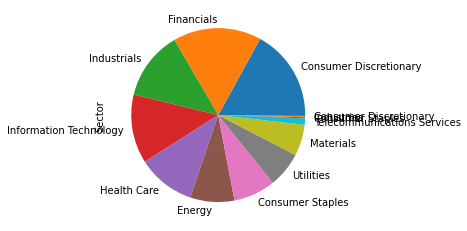

In [9]:
sp500_original['Sector'].value_counts().plot.pie()

<AxesSubplot:>

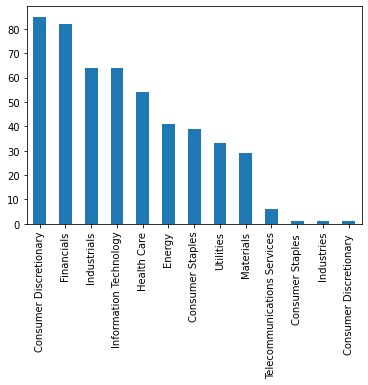

In [10]:
sp500_original['Sector'].value_counts().plot.bar()

In [11]:
sp500_original['Sector'].value_counts(ascending=True)

Consumer Staples                1
Industries                      1
Consumer Discretionary          1
Telecommunications Services     6
Materials                      29
                               ..
Health Care                    54
Industrials                    64
Information Technology         64
Financials                     82
Consumer Discretionary         85
Name: Sector, Length: 13, dtype: int64

In [12]:
# Создадим датафрейм с 4 столбцами
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(5, 4), columns=['A', 'B', 'C', 'D'])
df

          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [13]:
# Умножим ВСЕ на 2 (исходный датафрейм НЕ МЕНЯЕТСЯ)
df * 2

          A         B         C         D
0  0.938225 -0.565727 -3.018117 -2.271265
1  2.424224 -0.346429  0.238417 -2.088472
2 -1.723698 -4.209138 -0.989859  2.143608
3  1.443110 -1.413542 -2.079150  0.543720
4 -0.849945  1.134041  0.552464 -2.174801

In [14]:
# Извлекаем первую строку
s = df.iloc[0]

# Вычитаем первую стоку из КАЖДОЙ СТРОКИ объекта датафрейма.
diff = df - s
diff

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  0.743000  0.109649  1.628267  0.091396
2 -1.330961 -1.821706  1.014129  2.207436
3  0.252443 -0.423908  0.469484  1.407492
4 -0.894085  0.849884  1.785291  0.048232

In [15]:
# B, C
s2 = s[1:3]

# Добавляем E
s2['E'] = 0

# Смотрим, как применяется выравнивание в операции сложения
s2, '-----', df + s2

(B   -0.282863
 C   -1.509059
 E    0.000000
 Name: 0, dtype: float64,
 '-----',
     A         B         C   D   E
 0 NaN -0.565727 -3.018117 NaN NaN
 1 NaN -0.456078 -1.389850 NaN NaN
 2 NaN -2.387433 -2.003988 NaN NaN
 3 NaN -0.989634 -2.548633 NaN NaN
 4 NaN  0.284157 -1.232826 NaN NaN)

При выполнении арифметической операции между двумя объектами DataFrame
выравнивание происходит как по меткам индекса, так и по меткам столбцов. Следующий программный код извлекает фрагмент df и вычитает его из исходного
датафрейма. В результате видим, что выровненные значения, полученные в ре-
зультате вычитания, равны 0, а остальные получают значения NaN:


In [16]:
# Извлечем строки с 1 по 3 позицию и только столбцы В и С
subFrare  = df.loc[1:3][['B', 'C']]

# Мы извлеки небольшой квадрат из середины df
subFrare, subFrare.index

(          B         C
 1 -0.173215  0.119209
 2 -2.104569 -0.494929
 3 -0.706771 -1.039575,
 RangeIndex(start=1, stop=4, step=1))

In [17]:
# Демонстрируем, как происходит выравнивание при выполнении операции вычитания.
df, df - subFrare

(          A         B         C         D
 0  0.469112 -0.282863 -1.509059 -1.135632
 1  1.212112 -0.173215  0.119209 -1.044236
 2 -0.861849 -2.104569 -0.494929  1.071804
 3  0.721555 -0.706771 -1.039575  0.271860
 4 -0.424972  0.567020  0.276232 -1.087401,
     A    B    C   D
 0 NaN  NaN  NaN NaN
 1 NaN  0.0  0.0 NaN
 2 NaN  0.0  0.0 NaN
 3 NaN  0.0  0.0 NaN
 4 NaN  NaN  NaN NaN)

In [18]:
# Методы арифметических операций позволяют задать ось
# Извлекаем столбец A
a_col = df['A']
a_row = df.loc[1]
print(df)

# Вычтем столбец А ИЗ КАЖДОГО СТОЛБЦА датафрейма
print(df.sub(a_col, axis=0))
print(df.sub(a_row, axis=1))

          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401
     A         B         C         D
0  0.0 -0.751976 -1.978171 -1.604745
1  0.0 -1.385327 -1.092903 -2.256348
2  0.0 -1.242720  0.366920  1.933653
3  0.0 -1.428326 -1.761130 -0.449695
4  0.0  0.991993  0.701204 -0.662428
          A         B         C         D
0 -0.743000 -0.109649 -1.628267 -0.091396
1  0.000000  0.000000  0.000000  0.000000
2 -2.073961 -1.931355 -0.614138  2.116040
3 -0.490557 -0.533556 -1.158784  1.316096
4 -1.637084  0.740235  0.157023 -0.043165


#### Вычисление количества значений отличных от NaN.

In [19]:
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.count()

4

#### Определение уникальных значений

In [20]:
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

#### Количество уникальнхх значений (исключая значение NaN)

In [21]:
s.nunique()

3

#### Вычисляем встречаемость каждого уникального значения для нечисловых данных.

In [22]:
s.value_counts(dropna=False)

a      2
b      1
c      1
NaN    1
dtype: int64

#### Вычисление минимума и максимума

In [23]:
# Определим минимальную  и максимальную цену для обеих акций

omh[['MSFT', 'AAPL']].min(), '------', omh[['MSFT', 'AAPL']].max()

(MSFT     45.16
 AAPL    106.75
 dtype: float64,
 '------',
 MSFT     48.84
 AAPL    115.93
 dtype: float64)

#### Можно получить ИНДЕКСЫ минимального и максимального значения

In [24]:
omh[['MSFT', 'AAPL']].idxmin(), '------', omh[['MSFT', 'AAPL']].idxmax()

(MSFT    11
 AAPL    11
 dtype: int64,
 '------',
 MSFT    3
 AAPL    2
 dtype: int64)

#### Вычисление n наименьших значений

In [25]:
print(omh.nsmallest(5, ['MSFT'])['MSFT'])
print(omh.nsmallest(4, 'AAPL'))

11    45.16
12    45.74
21    46.45
10    46.67
7     46.90
Name: MSFT, dtype: float64
          Date   MSFT    AAPL
11  2014-12-16  45.16  106.75
10  2014-12-15  46.67  108.23
12  2014-12-17  45.74  109.41
9   2014-12-12  46.95  109.73


#### Получем 5 наибольших значенией MSFT

In [26]:
omh.nlargest(5, ['MSFT'])['MSFT']

3     48.84
0     48.62
1     48.46
16    48.45
4     48.42
Name: MSFT, dtype: float64

In [27]:
# Для вычисления n наибольш. и n ниименьш. значений у объекта Series не нужно указывать 
# столбец у методов nsmallest и nlargest т.к серия это и есть один столбец.
omh.MSFT.nsmallest(5)

11    45.16
12    45.74
21    46.45
10    46.67
7     46.90
Name: MSFT, dtype: float64

#### Вычисление накопительных значений

In [28]:
# Вычисление накопительного произведения (результатом будет 
# еще одна серия - накопительных зн.)
pd.Series(np.arange(1, 5)).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

In [29]:
# Вычисляем накопительную сумму.
pd.Series(np.arange(1, 5)).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

### Выполнение статистических операций

In [30]:
omh.describe()

            MSFT        AAPL
count  22.000000   22.000000
mean   47.493182  112.411364
std     0.933077    2.388772
min    45.160000  106.750000
25%    46.967500  111.660000
50%    47.625000  112.530000
75%    48.125000  114.087500
max    48.840000  115.930000

In [31]:
# Для нечисловых данных метод describe вернет др. результат
s = pd.Series(['a', 'a', 'b', 'b', 'b', 'c', np.NaN])
s.describe()

count     6
unique    3
top       b
freq      3
dtype: object

#### Вычисление среднего значения

In [32]:
omh[['MSFT', 'AAPL']].mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

In [33]:
# Вычислить ср. значение по строке 
# (т.е суммируются значения каждого столбца и делится на кол. столбцов.)
omh[:5], '------', omh[['MSFT', 'AAPL']].mean(axis=1)[:5]

(         Date   MSFT    AAPL
 0  2014-12-01  48.62  115.07
 1  2014-12-02  48.46  114.63
 2  2014-12-03  48.08  115.93
 3  2014-12-04  48.84  115.49
 4  2014-12-05  48.42  115.00,
 '------',
 0    81.845
 1    81.545
 2    82.005
 3    82.165
 4    81.710
 dtype: float64)

#### Вычисление медианы

In [34]:
omh[['MSFT', 'AAPL']].median()

MSFT     47.625
AAPL    112.530
dtype: float64


#### Вычисление моды

In [35]:
"""Обратите внимание, что данная строка возвратила не скалярное значение,
представляющее моду, а серию. Данный факт связан с тем, что мод может быть
несколько."""
s = pd.Series([1,2,3,3,5])
s.mode()

0    3
dtype: int64

In [36]:
# Может быть несколько мод
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode()

0    1
1    3
dtype: int64

#### Вычисление дисперсии и стандартного отклонения

In [37]:
# Вычисление дисперсии
omh[['MSFT', 'AAPL']].var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

In [38]:
# Вычислене стандартного отклонения
omh[['MSFT', 'AAPL']].std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

#### Вычисление ковариации

In [39]:
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

#### Вычисление корреляции